In [8]:
# Make all plots inline.
%matplotlib inline 

# Import dependencies
import folium
from folium.plugins import HeatMap
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
from IPython.core.display import display

In [110]:
# Load accident data.
accident_data = pd.read_csv('./data/NYPD_Motor_Vehicle_Collisions_sampled.csv')

# Accident Data Summary

In [111]:
accident_data.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,06/18/2016,5:20,BRONX,10456.0,40.824067,-73.908710,"(40.8240665, -73.9087095)",EAST 163 STREET,3 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3463614,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,06/18/2016,7:10,BRONX,10472.0,40.826916,-73.872030,"(40.8269163, -73.8720302)",METCALF AVENUE,WATSON AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3464214,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,06/18/2016,7:20,NaN,NaN,40.701455,-73.989620,"(40.7014547, -73.9896203)",NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3463782,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,06/18/2016,7:30,NaN,NaN,NaN,NaN,NaN,47 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3465413,PASSENGER VEHICLE,OTHER,NaN,NaN,NaN
4,06/18/2016,7:45,QUEENS,11422.0,40.665256,-73.735334,"(40.665256, -73.7353338)",SOUTH CONDUIT AVENUE,FRANCIS LEWIS BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,3463318,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [112]:
accident_data.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY
count,6395.000000,6687.000000,6687.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04
mean,10846.141048,40.723501,-73.917075,0.253500,0.000900,0.057600,0.000600,0.013900,0.0,0.206300,0.000400,3.554134e+06
std,554.570810,0.079065,0.086132,0.625361,0.029988,0.260939,0.024489,0.131562,0.0,0.702417,0.024493,1.272283e+05
min,10000.000000,40.504925,-74.247136,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.259120e+05
25%,10309.000000,40.667784,-73.974463,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.525040e+06
50%,11207.000000,40.721536,-73.926085,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.586995e+06
75%,11238.000000,40.767516,-73.861872,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.605235e+06
max,11697.000000,40.912295,-73.700597,12.000000,1.000000,6.000000,1.000000,3.000000,0.0,14.000000,2.000000,3.612908e+06


In [113]:
# Num rows in data.
print(accident_data.count())

DATE                             10000
TIME                             10000
BOROUGH                           6396
ZIP CODE                          6395
LATITUDE                          6687
LONGITUDE                         6687
LOCATION                          6687
ON STREET NAME                    6610
CROSS STREET NAME                 5197
OFF STREET NAME                   2174
NUMBER OF PERSONS INJURED        10000
NUMBER OF PERSONS KILLED         10000
NUMBER OF PEDESTRIANS INJURED    10000
NUMBER OF PEDESTRIANS KILLED     10000
NUMBER OF CYCLIST INJURED        10000
NUMBER OF CYCLIST KILLED         10000
NUMBER OF MOTORIST INJURED       10000
NUMBER OF MOTORIST KILLED        10000
CONTRIBUTING FACTOR VEHICLE 1     9950
CONTRIBUTING FACTOR VEHICLE 2     8320
CONTRIBUTING FACTOR VEHICLE 3      700
CONTRIBUTING FACTOR VEHICLE 4      196
CONTRIBUTING FACTOR VEHICLE 5       40
UNIQUE KEY                       10000
VEHICLE TYPE CODE 1               9779
VEHICLE TYPE CODE 2      

# Mapping Collisions

In [114]:
# Creating the map object to hold the different layers.

# Starting coordinates to load map view.
NYC_coordinates = (40.7142700, -74.0059700)

# Create Map object.
map = folium.Map(location=NYC_coordinates,
                 zoom_start=12,
                tiles = 'Cartodb Positron',
                control_scale = 'True')

# Create layer group for collisions (optional overlay)
col_group = folium.FeatureGroup(name='Collisions').add_to(map)

# Limit to 1000 records
MAX_RECORDS = 1000

# Add marker clusters to the feature group for collisions
collision_cluster = folium.MarkerCluster().add_to(col_group)
for row in accident_data[0:MAX_RECORDS].iterrows():
    # Only plot point if lat/long is available.
    if (not np.isnan(row[1]['LATITUDE']) and not np.isnan(row[1]['LONGITUDE'])):
        accident_metadata = """
                <ul>
                    <li><strong>On street</strong>: {0}</li>
                    <li><strong>Cross street</strong>: {1}</li>
                    <li><strong>Reason</strong>: {2}</li>
                </ul>""".format(
            str(row[1]['ON STREET NAME']), str(row[1]['CROSS STREET NAME']),
            str(row[1]['CONTRIBUTING FACTOR VEHICLE 1']))
        iframe = folium.element.IFrame(html=accident_metadata, width=250, height=100)
        popup = folium.Popup(iframe, max_width=2650)
        mark_color = 'red'
        if row[1]['NUMBER OF CYCLIST INJURED'] >= 1:
            mark_color = 'blue'
        folium.Marker(
                location = [row[1]['LATITUDE'], row[1]['LONGITUDE']],
                icon = folium.Icon(color = mark_color, icon='asterisk'),
                popup=popup).add_to(collision_cluster)

In [116]:
folium.LayerControl().add_to(map)
map

In [56]:
# Load pickle files containing aggregate data.
import pickle

agg_accident_data = pickle.load(open("./../traffic-density/accident_counts.pkl", "rb"))
agg_traffic_data = pickle.load(open("./../traffic-density/intersection_counts_yellow_updated.pkl", "rb"))
nodes_to_coord_data = pickle.load(open("./../traffic-density/nodes_to_coordinates.pkl", "rb"))

# Accident Counts by Year
acc_count_2013 = pickle.load(open("./../traffic-density/accident_counts_2013.pkl", "rb"))
acc_count_2014 = pickle.load(open("./../traffic-density/accident_counts_2014.pkl", "rb"))
acc_count_2015 = pickle.load(open("./../traffic-density/accident_counts_2015.pkl", "rb"))
acc_count_2016 = pickle.load(open("./../traffic-density/accident_counts_2016.pkl", "rb"))

# Traffic Score Data

In [133]:
# Function that provides 10 percentile buckets for provided array.
def computePercentileRanges(array):
    percentiles = []
    for x in np.linspace(0, 90, num=10):
        percentiles.append(np.nanpercentile(array, x))
    return percentiles

# Function that computes a rank between 1-10 for a node's score
# based on what percentile it falls in.
def computeNodeRank(score, percentiles):
    # Don't compute rank if score is nan.
    if score == np.nan:
        return np.nan
    for i, x in reversed(list(enumerate(percentiles))):
        if score >= x:
            return i + 1

sampleData = False
sampleSize = 1000

def computeData(input, output, file_suffix):
    detailed_output = []
    for k, num_accidents in input.items():
        if (sampleData and k > sampleSize):
            break;
        else:
            # Get lat/long of node.
            node = nodes_to_coord_data[k]
            node_id = node[0]
            lat = node[1]['lat']
            lon = node[1]['lon']
            cross_streets = node[1]['intersection_name']
            if cross_streets == "":
                cross_streets = "N/A"

            # Get amount of traffic at that node.
            traffic = agg_traffic_data[node_id]
            # There are some weird cases where traffic is less than the num accidents.
            # For now, we update traffic to equal the num_accidents.
            # Maybe this assumption should be revisited?
            if (traffic < num_accidents):
                traffic = num_accidents

            # Calculate intersection score.
            score = num_accidents/traffic
            nan_score = np.nan if traffic == num_accidents else score

            # Fourth value in array is a placeholder for the percentile bucket
            # which will be computed later.
            row = [lat, lon, score, 0]
            # First value in array is a placeholder for the percentile bucket
            # which will be computed later.
            detailed_row = np.array([0, cross_streets, lat, lon, nan_score, num_accidents, traffic])
        output.append(row)
        detailed_output.append(detailed_row)

    # Compute percentiles for scores.
    pd_detailed_output = pd.DataFrame(detailed_output,
                                       columns=['Bucketed Score', 'Intersection', 'Lat', 'Long',
                                                'Raw Score', '# Accidents', 'Traffic'])
    dtype = dtype={'Lat':'float64', 'Long':'float64','# Accidents':'int64',
                   'Raw Score': 'float64','Bucketed Score':'int64','Intersection':'str'}
    for k,v in dtype.items():
        pd_detailed_output[k] = pd_detailed_output[k].astype(v)
    output_percentiles = computePercentileRanges(np.array(pd_detailed_output['Raw Score']))
    # Populate percentiles in output and detailed_output arrays.
    for i, x in enumerate(output):
        output[i][3] = computeNodeRank(x[2], output_percentiles)
    pd_detailed_output['Bucketed Score'] = [computeNodeRank(x, output_percentiles) \
                                            for x in pd_detailed_output['Raw Score']]

    # Write detailed data to file.
    pd_detailed_output_sorted = pd_detailed_output.sort_values(['Bucketed Score', 'Raw Score'],
                                                               ascending=False)
    # Round raw score to 4 decimal places.
    pd_detailed_output_sorted["Raw Score"] = pd_detailed_output_sorted["Raw Score"].round(4)
    pd_detailed_output_sorted.to_csv('../website/data/accident_scores_data_' + file_suffix + '.csv',
                                     index=False)

In [134]:
# All Accidents
data = []
computeData(agg_accident_data, data, 'all')

# 2013 Accidents
data_13 = []
computeData(acc_count_2013, data_13, '13')

# 2014 Accidents
data_14 = []
computeData(acc_count_2014, data_14, '14')

# 2015 Accidents
data_15 = []
computeData(acc_count_2015, data_15, '15')

# 2016 Accidents
data_16 = []
computeData(acc_count_2016, data_16, '16')

# Heatmap

In [421]:
# Starting heatmap coordinates.
NYC_coordinates_HM = (40.78, -73.98)
radius = 15
blur = 15
min_opacity = 0.1
max_zoom = 13
max_val = 0.8


# Heatmap
map2 = folium.Map(location=NYC_coordinates_HM,
                 zoom_start=12,
                tiles = 'Cartodb Positron',
                control_scale = 'True')

# Can adjust radius and max_val to change the heatmap concentrations
HeatMap(data = data, name='Traffic Score (All Years)', radius=radius, blur=blur,
        min_opacity=min_opacity, max_zoom=max_zoom, max_val=max_val).add_to(map2)


# Adding Layers for Each Year
# Can only make it radio button if I set overlay=False, but this causes problems with map loading/refreshing

#HeatMap(data = data_13, name='Traffic Score (2013)', radius=radius, blur=blur, 
#        min_opacity=min_opacity, max_zoom=max_zoom, max_val=max_val).add_to(map2)
#HeatMap(data = data_14, name='Traffic Score (2014)', radius=radius, blur=blur, 
#        min_opacity=min_opacity, max_zoom=max_zoom, max_val=max_val).add_to(map2)
#HeatMap(data = data_15, name='Traffic Score (2015)', radius=radius, blur=blur, 
#        min_opacity=min_opacity, max_zoom=max_zoom, max_val=max_val).add_to(map2)
#HeatMap(data = data_16, name='Traffic Score (2016)', radius=radius, blur=blur, 
#        min_opacity=min_opacity, max_zoom=max_zoom, max_val=max_val).add_to(map2)

folium.LayerControl().add_to(map2)
map2

# Traffic Score Markers + Heatmap


In [24]:
sampleData = False
sampleSize = 1000

# Plot traffic score markers
NYC_coordinates_HM = (40.78, -73.98)
radius = 15
blur = 15
min_opacity = 0.1
max_zoom = 13
max_val = 0.8


# Map Object
map3 = folium.Map(location=NYC_coordinates_HM,
                 zoom_start=12,
                tiles = 'Cartodb Positron',
                control_scale = 'True')

marker_cluster = folium.MarkerCluster(name='Intersection Score Markers').add_to(map3)
for k, num_accidents in agg_accident_data.items():
    if (sampleData and k > sampleSize):
        break;
    if (num_accidents > 0):
        # Get lat/long of node.
        node = nodes_to_coord_data[k]
        node_id = node[0]
        lat = node[1]['lat']
        lon = node[1]['lon']

        # Get amount of traffic at that node.
        traffic = agg_traffic_data[node_id]
        # There are some weird cases where traffic is less than the num accidents.
        # For now, we update traffic to equal the num_accidents.
        # Maybe this assumption should be revisited?
        if (traffic < num_accidents):
            traffic = num_accidents
            
        # Calculate intersection score.
        score = num_accidents/traffic

        # Plot point.
        node_metadata = """
                    <ul>
                        <li><strong>Num accidents</strong>: {0}</li>
                        <li><strong>Traffic</strong>: {1}</li>
                        <li><strong>Score</strong>: {2}</li>
                    </ul>""".format(
                str(num_accidents), str(traffic), str(score))
        iframe = folium.element.IFrame(html=node_metadata, width=250, height=100)
        popup = folium.Popup(iframe, max_width=2650)
        score_color = "red"
        if (score > 0.001 and score < 0.01):
            score_color = "blue"
        if (score <= 0.001):
            score_color = "green"
        folium.Marker(
                location = [lat, lon],
                icon = folium.Icon(color=score_color, icon='asterisk'),
                popup=popup).add_to(marker_cluster)

        
# Can adjust radius and max_val to change the heatmap concentrations
HeatMap(data = data, name='Intersection Score Heatmp(All Years)', radius=radius, blur=blur,
        min_opacity=min_opacity, max_zoom=max_zoom, max_val=max_val).add_to(map3)


# Adding Layers for Each Year
# Can only make it radio button if I set overlay=False, but this causes problems with map loading/refreshing

#HeatMap(data = data_13, name='Traffic Score (2013)', radius=radius, blur=blur, 
#        min_opacity=min_opacity, max_zoom=max_zoom, max_val=max_val).add_to(map2)
#HeatMap(data = data_14, name='Traffic Score (2014)', radius=radius, blur=blur, 
#        min_opacity=min_opacity, max_zoom=max_zoom, max_val=max_val).add_to(map2)
#HeatMap(data = data_15, name='Traffic Score (2015)', radius=radius, blur=blur, 
#        min_opacity=min_opacity, max_zoom=max_zoom, max_val=max_val).add_to(map2)
#HeatMap(data = data_16, name='Traffic Score (2016)', radius=radius, blur=blur, 
#        min_opacity=min_opacity, max_zoom=max_zoom, max_val=max_val).add_to(map2)


# Only print the map in the notebook if sampling is on.
# Otherwise, it will crash your notebook.
# If not sampling the data, run the method in the next section
# to write out the generated html file and open that to see the results.

folium.LayerControl().add_to(map3)
if (sampleData):
    display(map3)

In [25]:
# Save html version of map.
map3.save('../website/heatmap_traffic_scores_v2.html')

# Prior Analysis

In [60]:
# Creating the map object to hold the different layers.

# Starting coordinates to load map view.
NYC_coordinates = (40.7142700, -74.0059700)

# Create Map object.
map = folium.Map(location=NYC_coordinates,
                 zoom_start=12,
                tiles = 'Cartodb Positron',
                control_scale = 'True')

# Tile layer for cycle map
# cycle_tile = folium.TileLayer(tiles = 'http://b.tile.opencyclemap.org/cycle/{z}/{x}/{y}.png', 
                              attr='Attributed').add_to(map)
# cycle_tile.layer_name = 'Cycling Route Map'

# Create a feature group for controlling multiple aspects

col_group = folium.FeatureGroup(name='Collisions').add_to(map)
injury_group = folium.FeatureGroup(name='Injuries').add_to(map)


# Plot accidents.
# Limit number of points to plot for testing.
MAX_RECORDS = 1000
collision_cluster = folium.MarkerCluster().add_to(col_group)
for row in accident_data[0:MAX_RECORDS].iterrows():
    # Only plot point if lat/long is available.
    if (not np.isnan(row[1]['LATITUDE']) and not np.isnan(row[1]['LONGITUDE'])):
        accident_metadata = """
                <ul>
                    <li><strong>On street</strong>: {0}</li>
                    <li><strong>Cross street</strong>: {1}</li>
                    <li><strong>Reason</strong>: {2}</li>
                </ul>""".format(
            str(row[1]['ON STREET NAME']), str(row[1]['CROSS STREET NAME']),
            str(row[1]['CONTRIBUTING FACTOR VEHICLE 1']))
        iframe = folium.element.IFrame(html=accident_metadata, width=250, height=100)
        popup = folium.Popup(iframe, max_width=2650)
        folium.Marker(
                location = [row[1]['LATITUDE'], row[1]['LONGITUDE']],
                icon = folium.Icon(color='red', icon='asterisk'),
                popup=popup).add_to(collision_cluster)

# Create new cluster group for cyclist injuries
bike_cluster = folium.MarkerCluster().add_to(injury_group)
for row in accident_data[0:MAX_RECORDS].iterrows():
    # Only plot point if lat/long is available.
    if (not np.isnan(row[1]['LATITUDE']) and not np.isnan(row[1]['LONGITUDE']) and row[1]['NUMBER OF CYCLIST INJURED'] >= 1 or row[1]['NUMBER OF CYCLIST KILLED'] >= 1):
        accident_metadata = """
                <ul>
                    <li><strong>On street</strong>: {0}</li>
                    <li><strong>Cross street</strong>: {1}</li>
                    <li><strong>Cyclists Injured</strong>: {2}</li>
                    <li><strong>Cyclists Killed</strong>: {3}</li>
                </ul>""".format(
            str(row[1]['ON STREET NAME']), str(row[1]['CROSS STREET NAME']),
            str(row[1]['NUMBER OF CYCLIST INJURED']), str(row[1]['NUMBER OF CYCLIST KILLED']))
        iframe = folium.element.IFrame(html=accident_metadata, width=250, height=100)
        popup = folium.Popup(iframe, max_width=2650)
        folium.Marker(
                location = [row[1]['LATITUDE'], row[1]['LONGITUDE']],
                icon = folium.Icon(color='blue', icon='asterisk'),
                popup=popup).add_to(bike_cluster)
        
# Create new cluster group for pedestrian injuries
ped_cluster = folium.MarkerCluster().add_to(injury_group)
for row in accident_data[0:MAX_RECORDS].iterrows():
    # Only plot point if lat/long is available.
    if (not np.isnan(row[1]['LATITUDE']) and not np.isnan(row[1]['LONGITUDE']) and row[1]['NUMBER OF PEDESTRIANS INJURED'] >= 1 or row[1]['NUMBER OF PEDESTRIANS KILLED'] >= 1):
        accident_metadata = """
                <ul>
                    <li><strong>On street</strong>: {0}</li>
                    <li><strong>Cross street</strong>: {1}</li>
                    <li><strong>Pedestrians Injured</strong>: {2}</li>
                    <li><strong>Pedestrians Killed</strong>: {3}</li>
                </ul>""".format(
            str(row[1]['ON STREET NAME']), str(row[1]['CROSS STREET NAME']),
            str(row[1]['NUMBER OF PEDESTRIANS INJURED']), str(row[1]['NUMBER OF PEDESTRIANS KILLED']))
        iframe = folium.element.IFrame(html=accident_metadata, width=250, height=100)
        popup = folium.Popup(iframe, max_width=2650)
        folium.Marker(
                location = [row[1]['LATITUDE'], row[1]['LONGITUDE']],
                icon = folium.Icon(color='green', icon='asterisk'),
                popup=popup).add_to(ped_cluster)

# Create new cluster group for automobile injuries
auto_cluster = folium.MarkerCluster().add_to(injury_group)
for row in accident_data[0:MAX_RECORDS].iterrows():
    # Only plot point if lat/long is available.
    if (not np.isnan(row[1]['LATITUDE']) and not np.isnan(row[1]['LONGITUDE']) and row[1]['NUMBER OF MOTORIST INJURED'] >= 1 or row[1]['NUMBER OF MOTORIST KILLED'] >= 1):
        accident_metadata = """
                <ul>
                    <li><strong>On street</strong>: {0}</li>
                    <li><strong>Cross street</strong>: {1}</li>
                    <li><strong>Motorists Injured</strong>: {2}</li>
                    <li><strong>Motorists Killed</strong>: {3}</li>
                </ul>""".format(
            str(row[1]['ON STREET NAME']), str(row[1]['CROSS STREET NAME']),
            str(row[1]['NUMBER OF MOTORIST INJURED']), str(row[1]['NUMBER OF MOTORIST KILLED']))
        iframe = folium.element.IFrame(html=accident_metadata, width=250, height=100)
        popup = folium.Popup(iframe, max_width=2650)
        folium.Marker(
                location = [row[1]['LATITUDE'], row[1]['LONGITUDE']],
                icon = folium.Icon(color='red', icon='asterisk'),
                popup=popup).add_to(auto_cluster)
        
# layer names for items separately        
# collision_cluster.layer_name = 'Collisions'
# bike_cluster.layer_name = 'Cyclist Injuries'
# ped_cluster.layer_name = 'Pedestrian Injuries'


folium.LayerControl().add_to(map)
map

# New Aggregate Intersection Counts

In [20]:
# Get sizes of data sets.
print(len(agg_accident_data))
print(len(agg_traffic_data))
print(len(nodes_to_coord_data))

3894
4472
4483


In [13]:
# Print sample of datasets.
dict(list(agg_accident_data.items())[0:5])

{0: 21, 1: 19, 2: 58, 3: 34, 5: 16}

In [14]:
dict(list(agg_traffic_data.items())[0:5])

{42426374: 8459,
 42459137: 250757,
 373268484: 496523,
 1773060099: 8202,
 3914862593: 4540}

In [57]:
nodes_to_coord_data[0:5]

[(42421728,
  {'highway': 'traffic_signals',
   'intersection_name': 'Central Park West & West 106th Street',
   'lat': 40.7980472,
   'lon': -73.96004,
   'osmid': '42421728',
   'ref': nan,
   'x': 587729.35665455484,
   'y': 4516859.0270689027}),
 (42421731,
  {'highway': 'traffic_signals',
   'intersection_name': 'Manhattan Avenue & West 106th Street',
   'lat': 40.798645,
   'lon': -73.9614743,
   'osmid': '42421731',
   'ref': nan,
   'x': 587607.57342485804,
   'y': 4516923.9536821311}),
 (42421737,
  {'highway': 'traffic_signals',
   'intersection_name': 'Columbus Avenue & West 106th Street',
   'lat': 40.7992369,
   'lon': -73.962876,
   'osmid': '42421737',
   'ref': nan,
   'x': 587488.55019145994,
   'y': 4516988.2598536853}),
 (42421741,
  {'highway': 'traffic_signals',
   'intersection_name': 'Amsterdam Avenue & West 106th Street',
   'lat': 40.8004313,
   'lon': -73.9657046,
   'osmid': '42421741',
   'ref': nan,
   'x': 587248.37035306217,
   'y': 4517118.0294734156}),


1
668


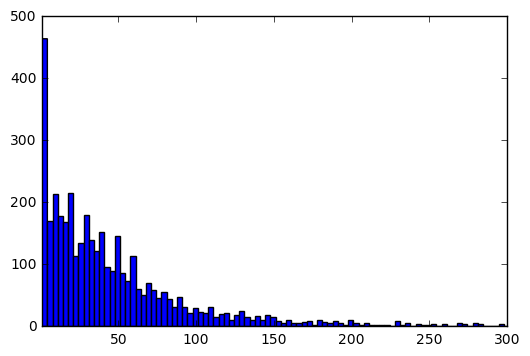

In [210]:
# Compute histogram of accident counts.
accident_numbers_list = list(agg_accident_data.values())
print(min(accident_numbers_list))
print(max(accident_numbers_list))
plt.xlim(min(accident_numbers_list), 300)
plt.hist(accident_numbers_list, bins=200)
plt.show()

0
807256


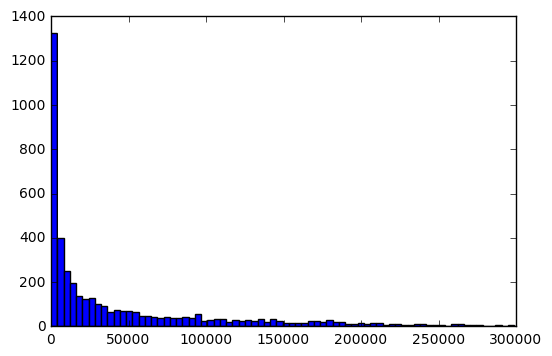

In [211]:
# Compute histogram of traffic counts.
traffic_numbers_list = list(agg_traffic_data.values())
print(min(traffic_numbers_list))
print(max(traffic_numbers_list))
plt.xlim(min(traffic_numbers_list), 300000)
plt.hist(traffic_numbers_list, bins=200)
plt.show()

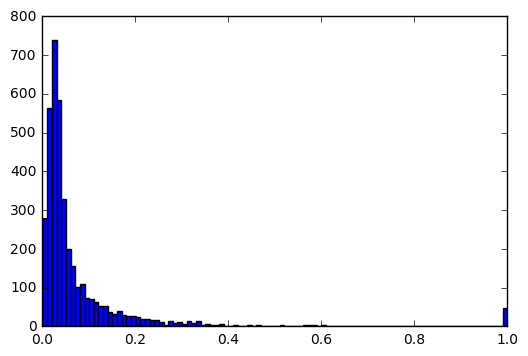

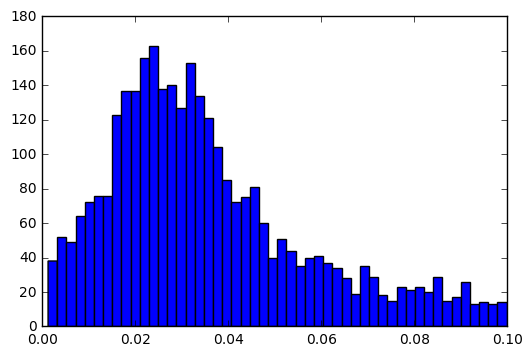

In [274]:
# Compute scores.
scores = []
for k, num_accidents in agg_accident_data.items():
    if (num_accidents > 0):
        node = nodes_to_coord_data[k]
        node_id = node[0]
        # Get amount of traffic at that node.
        traffic = agg_traffic_data[node_id]
        # There are some weird cases where traffic is 0 but accidents is > 0.
        # For now, we update traffic to equal the num_accidents.
        # Maybe this assumption should be revisited?
        if (traffic < num_accidents):
            traffic = num_accidents
        # Calculate intersection score.
        score = num_accidents/traffic
        scores.append(score)
        
# Compute histogram of scores.
plt.xlim(0, 1)
plt.hist(np.sqrt(scores), bins=100)
plt.show()


# Compute histogram of scores after filtering out high scores.
filtered_scores = [x for x in scores if x < 0.01]
plt.xlim(0, 0.1)
plt.hist(np.sqrt(filtered_scores), bins = 50)
plt.show()

In [275]:
# putting scores on a 1 to 10 scale
scores_1to10 = [(1 + (x - min(filtered_scores))*(10-1)/(max(filtered_scores)-min(filtered_scores))) for x in filtered_scores]

min(scores_1to10), max(scores_1to10)

(1.0, 10.0)

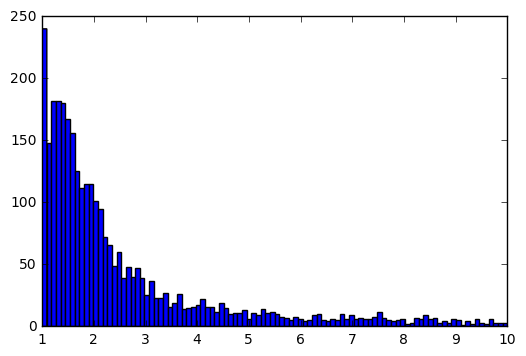

In [276]:
plt.xlim(1, 10)
plt.hist(scores_1to10, bins=100)
plt.show()